In [1]:
# Data
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics


In [2]:
TARGET = 'target'

train_labels = pd.read_csv('../input/amex-default-prediction/train_labels.csv')
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [3]:
split_params = [train_labels.drop(TARGET, axis=1), 
                train_labels[TARGET]]

x_train, x_test, y_train, y_test = train_test_split(*split_params, 
                                                    stratify=train_labels[TARGET])

In [4]:
model = DummyClassifier(strategy='stratified')

model.fit(x_train, y_train)

DummyClassifier(strategy='stratified')

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     85022
           1       0.26      0.26      0.26     29707

    accuracy                           0.62    114729
   macro avg       0.50      0.50      0.50    114729
weighted avg       0.62      0.62      0.62    114729
 



(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

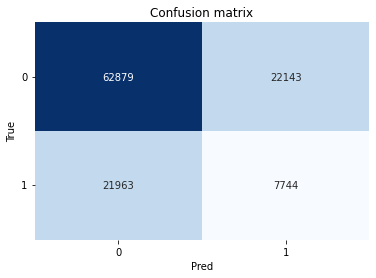

In [5]:
y_preds = model.predict(x_test)

# Show classification_report
print(metrics.classification_report(y_test, y_preds), '\n')

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, model.predict(y_preds))
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', 
            ax=ax, cmap=plt.cm.Blues, 
            cbar=False)

ax.set(xlabel="Pred", ylabel="True", xticklabels=y_test.unique(), 
       yticklabels=y_test.unique(), title="Confusion matrix")

plt.yticks(rotation=0)
